In [1]:
import pg8000
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Connecting to the database

In [242]:
conn = pg8000.connect(user = 'dot_student', database='training', port=5432, host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', password='qgis')

In [177]:
conn.rollback()

In [178]:
cursor = conn.cursor()

In [179]:
cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name='dot_311'")
# run the commented out code to see list of all column names
# cursor.fetchall()

In [188]:
cursor.execute("SELECT complaint, descriptor, created_date, closed_date FROM dot_311")
dot311 = cursor.fetchall()

In [190]:
# dot311

### Create a list of dictionaries that have the following structure:
    [
    ...
    
    
    
     {'closed_date': [datetime.datetime(2016, 2, 2, 9, 1)],
      'complaint': ['Street Condition'],
      'created_date': [datetime.datetime(2016, 2, 1, 7, 0)],
      'descriptor': ['Pothole'],
      'time_open': datetime.timedelta(1, 7260)},
     {'closed_date': [datetime.datetime(2016, 2, 2, 12, 50)],
      'complaint': ['Street Condition'],
      'created_date': [datetime.datetime(2016, 2, 1, 7, 0)],
      'descriptor': ['Pothole'],
      'time_open': datetime.timedelta(1, 21000)}, 
      
      
      ...
      
      ]

In [199]:
dot311_list=[]

for item in dot311: 
    
    dot311_dict={}
    
    dot311_dict['complaint'] = [item[0]]
    dot311_dict['descriptor'] = [item[1]]
    dot311_dict['created_date'] = [item[2]]
    dot311_dict['closed_date'] = [item[3]]
    
    # checks that created_date and closed_date are not NoneTypes and that the closed date is after the created date. 
    if dot311_dict['created_date'][0] != None and dot311_dict['closed_date'][0] != None and dot311_dict['closed_date']>dot311_dict['created_date']: 
        # subtracting datetime.datetime objects gives you a dateime.timedelta object
        # helpful: http://stackoverflow.com/questions/2861770/how-do-i-subtract-two-dates-in-django-python
        dot311_dict['time_open'] = dot311_dict['closed_date'][0] - dot311_dict['created_date'][0]
    else: 
        dot311_dict['time_open'] = None
    
    dot311_list.append(dot311_dict)

In [200]:
# dot311_list

### Create a dataframe from list of dicts

In [201]:
df = pd.DataFrame.from_dict(dot311_list)

In [202]:
df.head(50)

,closed_date,complaint,created_date,descriptor,time_open
0,[2016-02-01 01:15:00],[Traffic Signal Condition],[2016-02-01 00:12:00],[Controller],0 days 01:03:00
1,[2016-02-01 00:54:00],[Traffic Signal Condition],[2016-02-01 00:14:00],[Controller],0 days 00:40:00
2,[2016-02-01 01:30:00],[Traffic Signal Condition],[2016-02-01 00:15:00],[Controller],0 days 01:15:00
3,[2016-02-01 02:35:00],[Traffic Signal Condition],[2016-02-01 00:17:00],[Controller],0 days 02:18:00
4,[2016-02-01 01:00:00],[Traffic Signal Condition],[2016-02-01 00:19:00],[Controller],0 days 00:41:00
5,[2016-02-01 02:00:00],[Traffic Signal Condition],[2016-02-01 00:21:00],[Controller],0 days 01:39:00
6,[2016-02-01 01:30:00],[Traffic Signal Condition],[2016-02-01 00:22:00],[Controller],0 days 01:08:00
7,[2016-02-01 01:05:00],[Traffic Signal Condition],[2016-02-01 00:27:00],[Controller],0 days 00:38:00
8,[2016-02-01 00:42:00],[Traffic Signal Condition],[2016-02-01 00:32:00],[Base Door],0 days 00:10:00
9,[2016-02-01 22:30:00],[Street Condition],[2016-02-01 00:32:16],[Pothole],0 days 21:57:44


### FIVE NUMBER SUMMARY for the length of time between creating the complaint and closing the complaint
minimum, maximum, first quartile, median, third quartile

In [284]:
minimum = df['time_open'].min()
print(minimum)
# dang, so fast. 

0 days 00:00:01


In [283]:
maximum = df['time_open'].max()
print(maximum)

89 days 18:54:00


In [282]:
first_qtr = df['time_open'].quantile(q=0.25)
print(first_qtr)

0 days 12:41:58


In [285]:
median = df['time_open'].quantile(q=0.5)
print(median)

1 days 03:33:17


In [286]:
third_qtr = df['time_open'].quantile(q=0.75)
print(third_qtr)

6 days 00:30:23.500000


In [235]:
df['time_open_hours'] = df['time_open'].apply(lambda x: x.total_seconds()) / 60 / 60

In [256]:
# note: this was necessary because the by parameter of the box plot only accepts sequences, i.e. tuples and other such things
# if you try to use the original complaint column it returns an error saying that "by" only accepts sequences, not groupby sequences 
df['complaint_'] = df['complaint'].apply(lambda x: (x[0]))

### A quick boxplot of hours a complaint is open, grouped by type of complaint
*the alignment on this graph is shifted one to the right

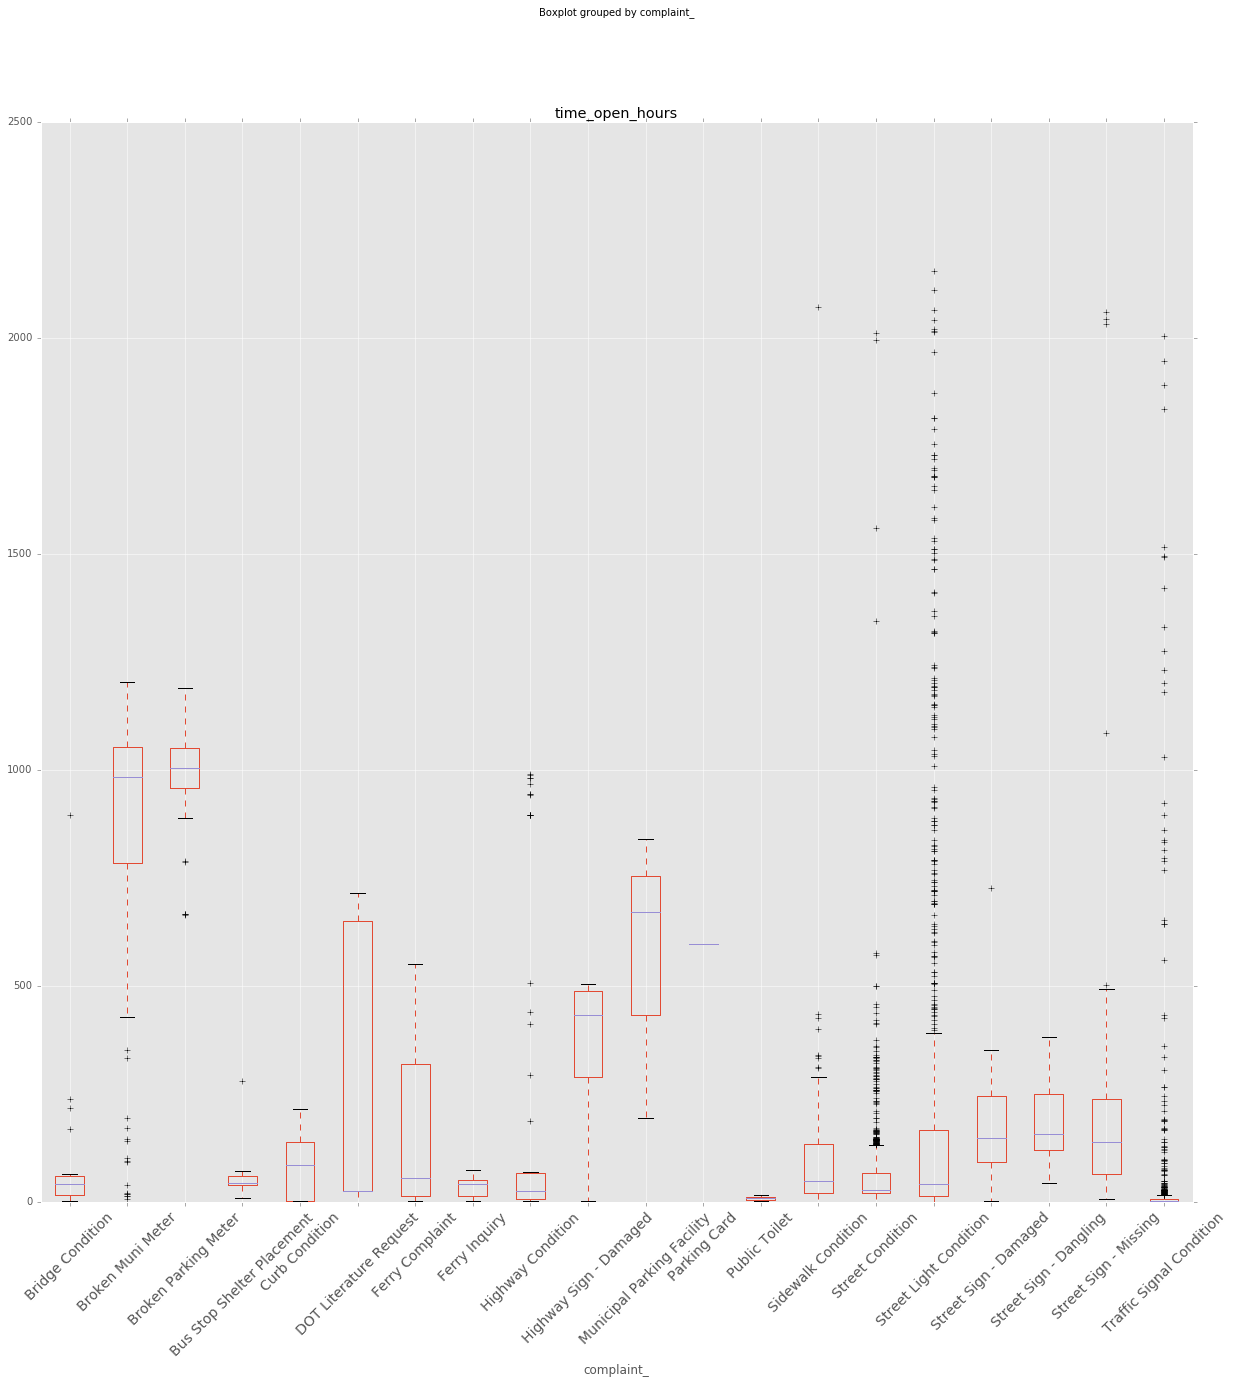

In [281]:
ax = df.boxplot(column='time_open_hours', by='complaint_', figsize=(20,20), rot=45, fontsize=14)